In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import datetime as dt
import pandas_datareader as web
import yfinance as yf

yf.pdr_override()

start = dt.datetime(2009,12,31)
end = dt.datetime(2019,12,31)
df = web.data.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.396729,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200


In [7]:
df=web.data.DataReader('AAPL','2010-01-01','2019-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [8]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


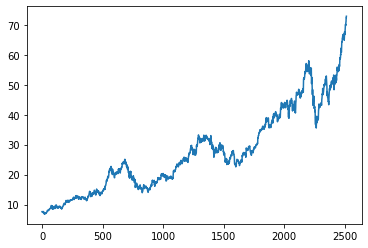

In [11]:
plt.plot(df.Close)

In [12]:
#ma=moving avg
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

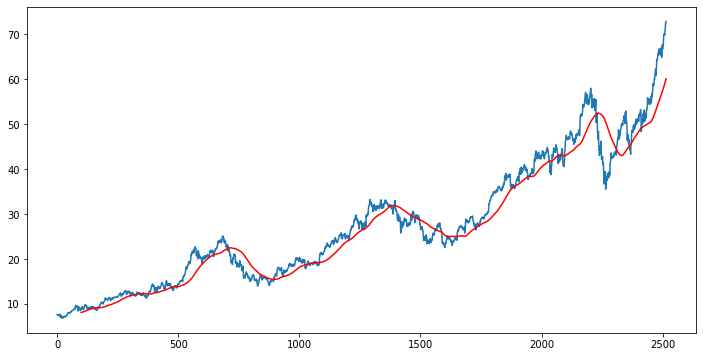

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

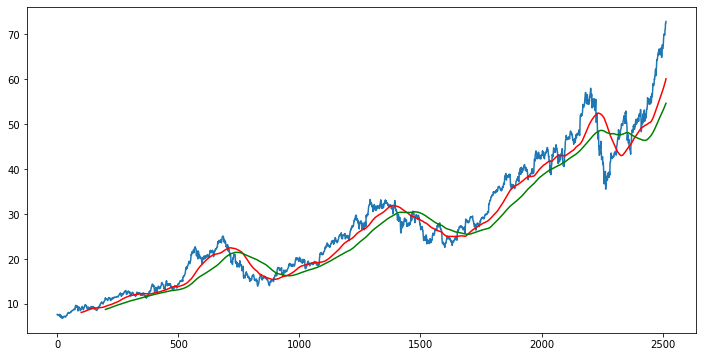

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
df.shape

(2515, 5)

In [17]:
# spliting training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train=np.array(x_train), np.array(y_train)

In [21]:
#ml model

In [41]:
import sys
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install streamlit

     |████████████████████████████████| 8.9 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 236 kB/s eta 0:00:011
     |████████████████████████████████| 238 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 15.9 MB/s eta 0:00:01


     |████████████████████████████████| 426 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 39.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 164 kB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 813 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.7 MB/s eta 0:00:011
     |████████████████████████████████| 74 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 55 kB 8.2 MB/s  eta 0:00:01
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19565 sha256=c06a4d960923a2b9d2817ef54208fed725416f06a1c45f804639749e2c1209a1
  Stored in directory: /home/anuj/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
          
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.4))
          
model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 12s 162ms/step - loss: 0.0694
Epoch 2/50
52/52 [==============================] - 20s 384ms/step - loss: 0.0122
Epoch 3/50
52/52 [==============================] - 17s 331ms/step - loss: 0.0093
Epoch 4/50
52/52 [==============================] - 12s 226ms/step - loss: 0.0084
Epoch 5/50
52/52 [==============================] - 11s 204ms/step - loss: 0.0075
Epoch 6/50
52/52 [==============================] - 11s 213ms/step - loss: 0.0074
Epoch 7/50
52/52 [==============================] - 11s 204ms/step - loss: 0.0070
Epoch 8/50
52/52 [==============================] - 11s 203ms/step - loss: 0.0071
Epoch 9/50
52/52 [==============================] - 11s 203ms/step - loss: 0.0059
Epoch 10/50
52/52 [==============================] - 11s 204ms/step - loss: 0.0065
Epoch 11/50
52/52 [==============================] - 11s 206ms/step - loss: 0.0061
Epoch 12/50
52/52 [==============================] - 11s 204ms/step - loss: 0.0057
Epoch 13/50
5

In [27]:
model.save('keras_model.h5')

In [28]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [29]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [30]:
past_100_days=data_training.tail(100)

In [31]:
final_df=past_100_days.append(data_testing,ignore_index=True)

<ipython-input-31-46277fdece45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [32]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [33]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [34]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [35]:
input_data.shape

(855, 1)

In [36]:
x_test, y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [37]:
# make predictions

y_predicted=model.predict(x_test)

24/24 [==============================] - 2s 63ms/step


In [38]:
scaler.scale_

array([0.02123255])

In [39]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

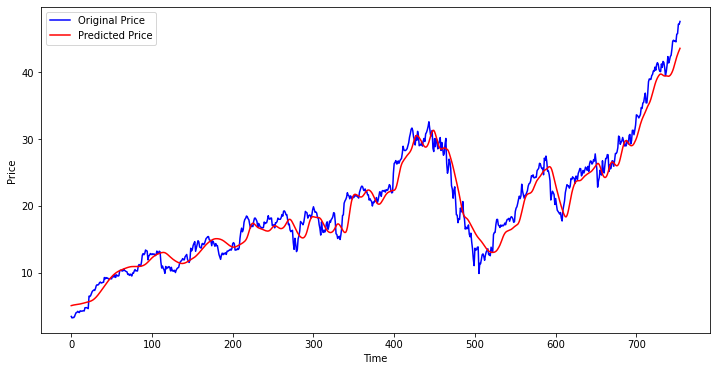

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()